In [1]:
from utils import *
from defense import *
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

/Users/stanislas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/stanislas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/stanislas/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/stanislas/opt/anaconda3/lib/python3.7/site-packages

ModuleNotFoundError: No module named 'imutils'

In [ ]:
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
sess = tf.Session(config=config)

In [ ]:
def ssim_score(cleandata,data):
#     cleandata = (cleandata * 255).astype('uint8')
#     data = (data * 255).astype('uint8')
    SSIM = []
    for i in range(cleandata.shape[0]):
        ssim = compare_ssim(cleandata[i], data[i], multichannel=True, data_range = 1.0)
        SSIM.append(ssim)
    SSIM = np.asarray(SSIM)
    return SSIM.mean()

In [ ]:
# the seleted data from the imagenet validation set
cleandata = np.load("./data/clean100data.npy")
cleanlabel = np.load("./data/clean100label.npy")

In [ ]:
data_FD = defend_FD(cleandata)
data_fdgd = defended('GD',data_FD)
data_fdrd = defended('onlyrand',data_FD)
data_gd = defended('GD',cleandata)
data_rd = defended('onlyrand',cleandata)
data_pd = defended('pixel_deflection',cleandata)
data_shield = defended('SHIELD',cleandata)
data_br = defended('BitReduct',cleandata)
data_tv = defended('TotalVarience',cleandata)

In [52]:
#FD
print(l2_distortion(cleandata,data_FD))
print(ssim_score(cleandata,data_FD))

0.13431759392654855
0.43096973258903665


In [53]:
#FD+GD
print(l2_distortion(cleandata,data_fdgd))
print(ssim_score(cleandata,data_fdgd))

0.19435364512933304
0.3092753200182564


In [54]:
#FD+RD
print(l2_distortion(cleandata,data_fdrd))
print(ssim_score(cleandata,data_fdrd))

0.22441430282787198
0.3030068280206999


In [55]:
#GD
print(l2_distortion(cleandata,data_gd))
print(ssim_score(cleandata,data_gd))

0.19031180925981048
0.3116122177251384


In [56]:
#RD
print(l2_distortion(cleandata,data_rd))
print(ssim_score(cleandata,data_rd))

0.23307408222613568
0.307569339399697


In [57]:
#PD
print(l2_distortion(cleandata,data_pd))
print(ssim_score(cleandata,data_pd))

0.014663459253392193
0.9876361376503487


In [58]:
#shield
print(l2_distortion(cleandata,data_shield))
print(ssim_score(cleandata,data_shield))

0.04042476744119344
0.8476091176245757


In [59]:
#BR
print(l2_distortion(cleandata,data_br))
print(ssim_score(cleandata,data_br))

0.07090488381913351
0.7730299279713583


In [61]:
data_tv = defended('TotalVarience',cleandata)
print(l2_distortion(cleandata,data_tv))
print(ssim_score(cleandata,data_tv))

0.0337982249224753
0.8759207693251954


In [62]:
np.save('./data/'+'FD'+'_def_data.npy',data_FD)
np.save('./data/'+'fdgd'+'_def_data.npy',data_fdgd)
np.save('./data/'+'fdrd'+'_def_data.npy',data_fdrd)
np.save('./data/'+'rd'+'_def_data.npy',data_rd)
np.save('./data/'+'gd'+'_def_data.npy',data_gd)
np.save('./data/'+'pd'+'_def_data.npy',data_pd)
np.save('./data/'+'shield'+'_def_data.npy',data_shield)
np.save('./data/'+'br'+'_def_data.npy',data_br)
np.save('./data/'+'tv'+'_def_data.npy',data_tv)

In [63]:
data_FD = np.load('./data/'+'FD'+'_def_data.npy')
data_fdgd = np.load('./data/'+'fdgd'+'_def_data.npy')
data_fdrd = np.load('./data/'+'fdrd'+'_def_data.npy')
data_rd = np.load('./data/'+'rd'+'_def_data.npy')
data_gd = np.load('./data/'+'gd'+'_def_data.npy')
data_pd = np.load('./data/'+'pd'+'_def_data.npy')
data_shield = np.load('./data/'+'shield'+'_def_data.npy')
data_br = np.load('./data/'+'br'+'_def_data.npy')
data_tv = np.load('./data/'+'tv'+'_def_data.npy')

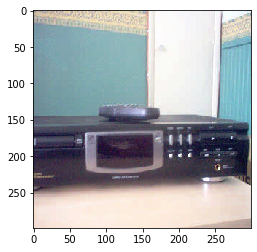

In [8]:
plt.imshow(data_FD[0])

SSIM: 0.7124078595301336


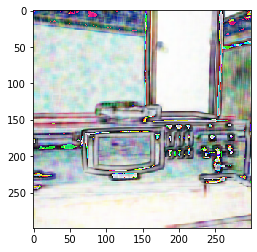

In [7]:
(score, diff) = compare_ssim(cleandata[0], data_FD[0], full=True, multichannel=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
plt.imshow(diff)